# Tutorial 3

## Characterization of Stellar Activity Components

This tutorial demonstrates how `ARVE` can be used to characterize stellar activity components (such as oscillations and granulation phenomena) by fitting the components with analytical functions in the velocity power spectral density (VPSD).

We begin by importing the `ARVE` package and other useful packages.

In [1]:
# Import packages
import arve
import matplotlib.pyplot as plt
import pandas            as pd

For our analysis, we make use of some synthetic RVs computed in [Tutorial 0](https://arve.readthedocs.io/en/latest/tutorials/tutorial_0.html) and downloadable [here](https://github.com/almoulla/arve/tree/main/docs/tutorials/example_data).

In [2]:
# Read RVs
df = pd.read_csv("example_data/tutorial_3/vrad.csv")
time_val = df["time_val"].values
vrad_val = df["vrad_val"].values
vrad_err = df["vrad_err"].values

The RVs are fed to an `ARVE` object and plotted for visualization.

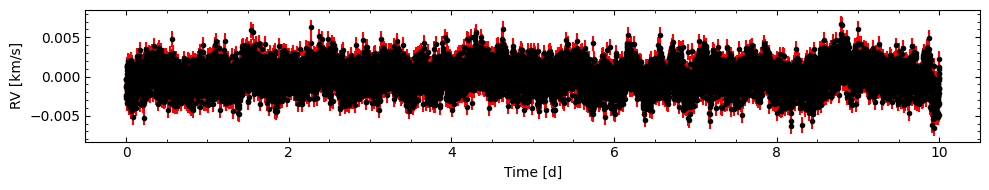

In [3]:
# Initiate ARVE object and plot RVs
example = arve.ARVE()
example.star.target = "Sun"
example.star.get_stellar_parameters()
example.data.add_data(time_val=time_val,
                     vrad_val=vrad_val,
                     vrad_err=vrad_err)
fig = example.data.plot_vrad(figsize=(10,2))
plt.show(fig)

We perform the VPSD analysis in 3 steps:
1. Compute the VPSD from the input data.
2. Add the expected VPSD components based on the span and cadence of the input.
3. Fit the coefficients of the analytical VPSD components to the computed VPSD.

The final results can thereafter be plotted.

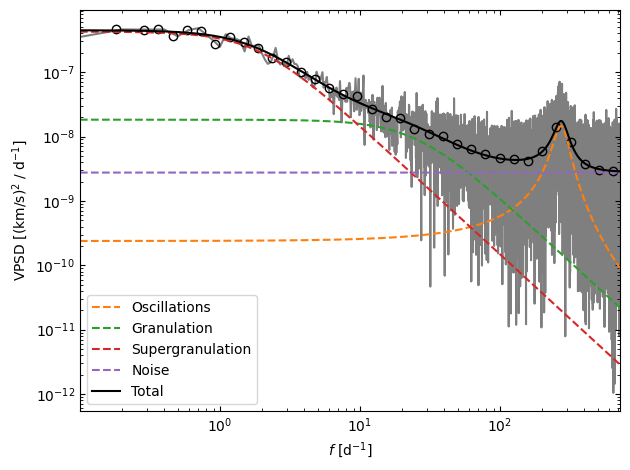

In [4]:
# Compute VPSD, add VPSD components, fit VPSD coefficients and plot everything
example.star.compute_vpsd()
example.star.add_vpsd_components()
example.star.fit_vpsd_coefficients()
fig = example.star.plot_vpsd_components()
plt.show(fig)

For further analysis, the best-fit VPSD coefficients can be accessed in the `ARVE` object. For example, the granulation timescale is obtained like this:

In [5]:
# Print granulation timescale
print("Granulation coefficient names:")
print(example.star.vpsd_components["granulation"]["coef_name"])
print("Granulation timescale [hr]:")
print(example.star.vpsd_components["granulation"]["coef_val"][1]*24)

Granulation coefficient names:
['amplitude', 'timescale', 'decay rate']
Granulation timescale [hr]:
0.962004134983532
